# Evaluierung

## Korrelation

### Herzfrequenz

Best correlation between the Signals: -436 Minutes offset


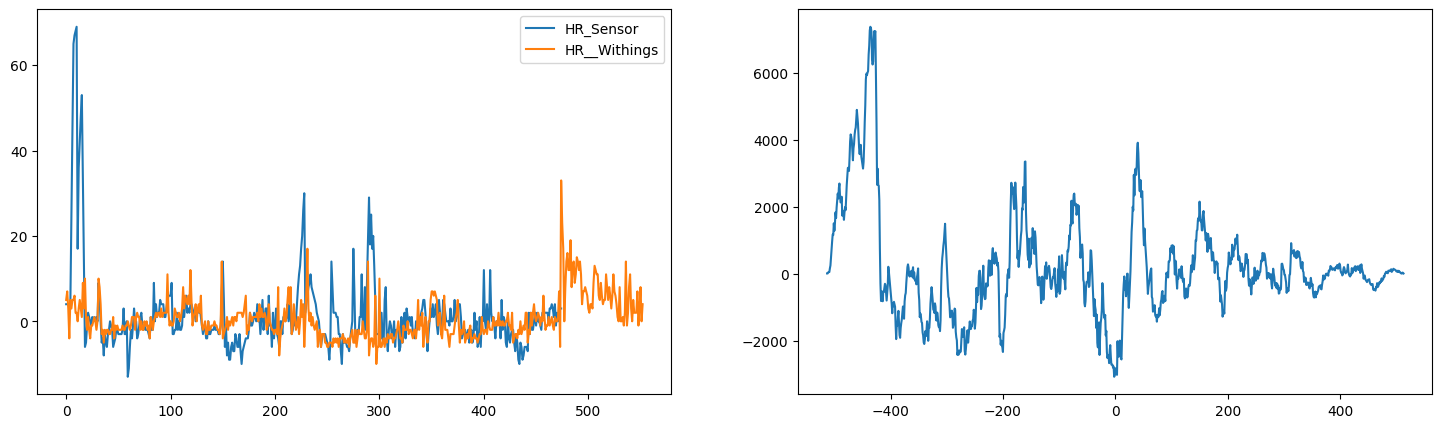

In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import signal

date = "30112021"

df_sensor = pd.read_csv("Sensordata/clean/" + date + "_sensor_data")
df_withings = pd.read_csv("Withings_Data/clean/" + date + "_withings_data")

hr_sensor = df_sensor["hr_sensor"].to_list()
hr_withings = df_withings["hr_withings"].to_list()
# hr_s_norm = (hr_sensor - np.min(hr_sensor)) / (np.max(hr_sensor) - np.min(hr_sensor))
# hr_w_norm = (hr_withings - np.min(hr_withings)) / (np.max(hr_withings) - np.min(hr_withings))
hr_s_norm = hr_sensor - np.median(hr_sensor)
hr_w_norm = hr_withings - np.median(hr_withings)
cross_corr = signal.correlate(hr_s_norm, hr_w_norm, "full", method="fft").tolist()
x_vals = range(int(-len(cross_corr)/2), int(-len(cross_corr)/2)+int(len(cross_corr)))
plt.style.use('default')
plt.rcParams['figure.figsize'] = [18,5]
plt.subplot(121)
plt.plot(hr_s_norm, label="HR_Sensor")
plt.plot(hr_w_norm, label="HR__Withings")
plt.legend()
plt.subplot(122)
plt.plot(x_vals, cross_corr)
plt.show
print("Best correlation between the Signals:", cross_corr.index(max(cross_corr))-int(len(cross_corr)/2), "Minutes offset")

### Atemfrequenz

Best correlation between the Signals: 38 Minutes offset


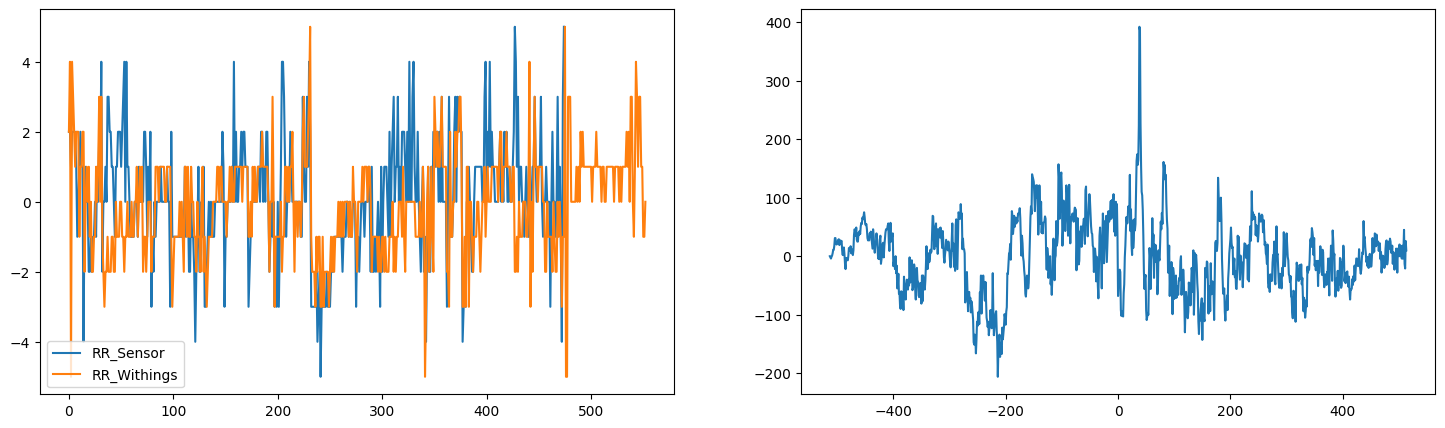

In [41]:
rr_sensor = df_sensor["rr_sensor"].to_list()
rr_withings = df_withings["rr_withings"].to_list()
# rr_s_norm = (rr_sensor - np.min(rr_sensor)) / (np.max(rr_sensor) - np.min(rr_sensor))
# rr_w_norm = (rr_withings - np.min(rr_withings)) / (np.max(rr_withings) - np.min(rr_withings))
rr_s_norm = rr_sensor - np.median(rr_sensor)
rr_w_norm = rr_withings - np.median(rr_withings)
cross_corr = signal.correlate(rr_s_norm, rr_w_norm, "full", method="fft").tolist()
x_vals = range(int(-len(cross_corr)/2), int(-len(cross_corr)/2)+int(len(cross_corr)))
plt.style.use('default')
plt.rcParams['figure.figsize'] = [18,5]
plt.subplot(121)
plt.plot(rr_s_norm, label="RR_Sensor")
plt.plot(rr_w_norm, label="RR_Withings")
plt.legend()
plt.subplot(122)
plt.plot(x_vals, cross_corr)
plt.show
print("Best correlation between the Signals:", cross_corr.index(max(cross_corr))-int(len(cross_corr)/2), "Minutes offset")

### Schlafphasen

Best correlation between the Signals: -100 Minutes offset


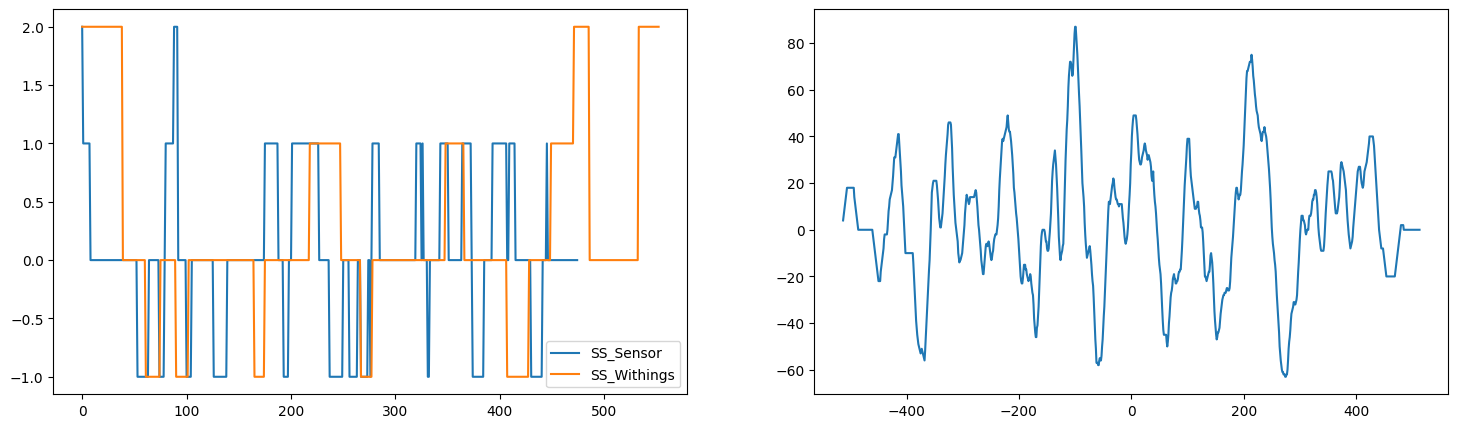

In [42]:
ss_sensor = df_sensor["ss_sensor"].to_list()
ss_withings = df_withings["ss_withings"].to_list()
# ss_s_norm = (ss_sensor - np.min(ss_sensor)) / (np.max(ss_sensor) - np.min(ss_sensor))
# ss_w_norm = (ss_withings - np.min(ss_withings)) / (np.max(ss_withings) - np.min(ss_withings))
ss_s_norm = ss_sensor - np.median(ss_sensor)
ss_w_norm = ss_withings - np.median(ss_withings)
cross_corr = signal.correlate(ss_s_norm, ss_w_norm, "full", method="fft").tolist()
x_vals = range(int(-len(cross_corr)/2), int(-len(cross_corr)/2)+int(len(cross_corr)))
plt.style.use('default')
plt.rcParams['figure.figsize'] = [18,5]
plt.subplot(121)
plt.plot(ss_s_norm, label="SS_Sensor")
plt.plot(ss_w_norm, label="SS_Withings")
plt.legend()
plt.subplot(122)
plt.plot(x_vals, cross_corr)
plt.show
print("Best correlation between the Signals:", cross_corr.index(max(cross_corr))-int(len(cross_corr)/2),"Minutes offset")